In [34]:
import pandas as pd
from datetime import datetime
from datetime import datetime

# Import filtered table from Global Footprint Network
df = pd.read_csv("Filtered_Earth_Overshoot_Days_2024.csv")
df = df.rename(columns = {"Total Ecological Footprint (Consumption)" : "footprint_consumption", 
                          "Total Ecological Footprint (Production)" : "footprint_production",
                          "Number of Earths required" : "num_earths",
                          "Official Overshoot Day" : "official_overshoot_day"
                          })

# country_footprint = total ecological footprint global hectares per person (consumption)

# Fuction to calculate overshoot day
def OvershootDayConsumption(footprint_consumption):
         global_footprint = 1.51 # 2024 figure
         day_num = int(366*(global_footprint/footprint_consumption))
        
        # accounting for countries using less than 1 year of resources
         if day_num > 366: # running into 2025
                 day_num -= 366 # leap year in 2024
                 if day_num > 365: # running into 2026
                         day_num -= 365
                         date = datetime.strptime("2026-" + str(day_num), "%Y-%j").strftime("%Y-%m-%d")                         
                 else:
                         date = datetime.strptime("2025-" + str(day_num), "%Y-%j").strftime("%Y-%m-%d")
         else:   
                date = datetime.strptime("2024-" + str(day_num), "%Y-%j").strftime("%Y-%m-%d")
         return date


# Apply function row-wise to calculate overshoot_day
df["overshoot_day_consumption"] = df["footprint_consumption"].apply(OvershootDayConsumption)

# Calculating difference between calculated overshoot days and official overshoot days
# Convert 'overshoot_day' column to datetime format for consistency
df['overshoot_day_consumption'] = pd.to_datetime(df['overshoot_day_consumption'])

# Convert 'official_overshoot_day' column to datetime format, handle NaN values
df['official_overshoot_day'] = pd.to_datetime(df['official_overshoot_day'], errors='coerce')

# Perform subtraction and extract the number of days
df['difference'] = (df['overshoot_day_consumption'] - df['official_overshoot_day']).dt.days

df


,Country,Quality Score,SDGi,Life Exectancy,HDI,Per Capita GDP,Region,Income Group,Population (millions),footprint_production,footprint_consumption,Total biocapacity,Ecological (Deficit) or Reserve,num_earths,Number of Countries required,official_overshoot_day,overshoot_day_consumption,difference
0,Afghanistan,3A,52.5,62,0.48,NaN,Middle East/Central Asia,LI,40.8,0.679451,0.801465,0.513827,-0.3,0.5,1.6,NaT,2025-11-19,NaN
1,Albania,3A,71.6,76,0.8,"$14,889",Other Europe,UM,2.9,1.626551,2.071238,1.176752,-0.9,1.4,1.8,2024-09-23,2024-09-22,-1.0
2,Algeria,3A,71.5,76,0.75,"$11,137",Africa,UM,45.4,1.769579,2.222968,0.663375,-1.6,1.5,3.4,2024-09-04,2024-09-04,0.0
3,Angola,3A,50.9,62,0.59,"$6,304",Africa,LM,35,0.598284,0.857846,1.588191,0.7,0.6,0.5,NaT,2025-10-05,NaN
4,Antigua and Barbuda,2B,NaN,78,0.79,"$18,749",Central America/Caribbean,HI,0.1,1.508591,2.936735,0.917277,-2.0,1.9,3.2,2024-07-06,2024-07-06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,"Venezuela, Bolivarian Republic of",3A,60.3,71,0.69,NaN,South America,UM,29.3,2.124106,2.109537,2.945992,0.8,1.4,0.7,2024-09-18,2024-09-17,-1.0
177,Viet Nam,3A,72.8,74,0.7,"$11,032",Asia-Pacific,LM,99,2.237806,2.432274,0.795070,-1.6,1.6,3.1,2024-08-14,2024-08-14,0.0
178,Yemen,3A,52.1,64,0.46,"$1,780",Middle East/Central Asia,LM,31.2,0.371747,0.613258,0.347502,-0.3,0.4,1.8,NaT,2026-06-19,NaN
179,Zambia,3A,NaN,NaN,NaN,NaN,Africa,LM,19.5,1.155055,1.213215,1.651920,0.4,0.8,0.7,NaT,2025-03-30,NaN


In [4]:
# Save results as csv

df.to_csv('Earth_Overshoot_2004.csv', index=False) 

In [8]:
df[df.overshoot_day_consumption.str.contains("2024-05-27")]


,Country,Quality Score,SDGi,Life Exectancy,HDI,Per Capita GDP,Region,Income Group,Population (millions),footprint_production,footprint_consumption,Total biocapacity,Ecological (Deficit) or Reserve,num_earths,Number of Countries required,official_overshoot_day,overshoot_day_consumption,difference
40,Croatia,3A,78.8,76,0.86,"$31,007",Other Europe,HI,4.1,3.340532,3.711865,2.571672,-1.1,2.5,1.4,2024-05-28,2024-05-27,-1.0
60,French Polynesia,2B,NaN,79,NaN,NaN,Asia-Pacific,HI,0.3,2.021414,3.717598,1.127149,-2.6,2.5,3.3,2024-05-28,2024-05-27,-1.0
103,Malta,2B,76.8,83,0.92,"$46,806",EU-27,HI,0.4,1.204712,3.721980,0.467364,-3.3,2.5,8.0,2024-05-28,2024-05-27,-1.0
129,Portugal,3A,79.2,81,0.87,"$34,950",EU-27,HI,10.1,2.865368,3.719396,1.478047,-2.2,2.5,2.5,2024-05-28,2024-05-27,-1.0


[2024-05-15 11:26:02,313] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\Users\YatwanHui\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 2529, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\YatwanHui\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\YatwanHui\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\YatwanHui\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1799, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [7]:
df[df.Country.str.contains("Malta")]


,Country,Quality Score,SDGi,Life Exectancy,HDI,Per Capita GDP,Region,Income Group,Population (millions),footprint_production,footprint_consumption,Total biocapacity,Ecological (Deficit) or Reserve,num_earths,Number of Countries required,official_overshoot_day,overshoot_day_consumption,difference
103,Malta,2B,76.8,83,0.92,"$46,806",EU-27,HI,0.4,1.204712,3.72198,0.467364,-3.3,2.5,8.0,2024-05-28,2024-05-27,-1.0


#### 4. Plot a graph of Overshoot Dates-number of countries 
- See the spread of countries overshooting a lot to little. 
- Note: None values need to be on the right-hand side, assign as 1 Jan 2025?
- Or even calculate the number of bonus days?
- colour coordinate based on continent

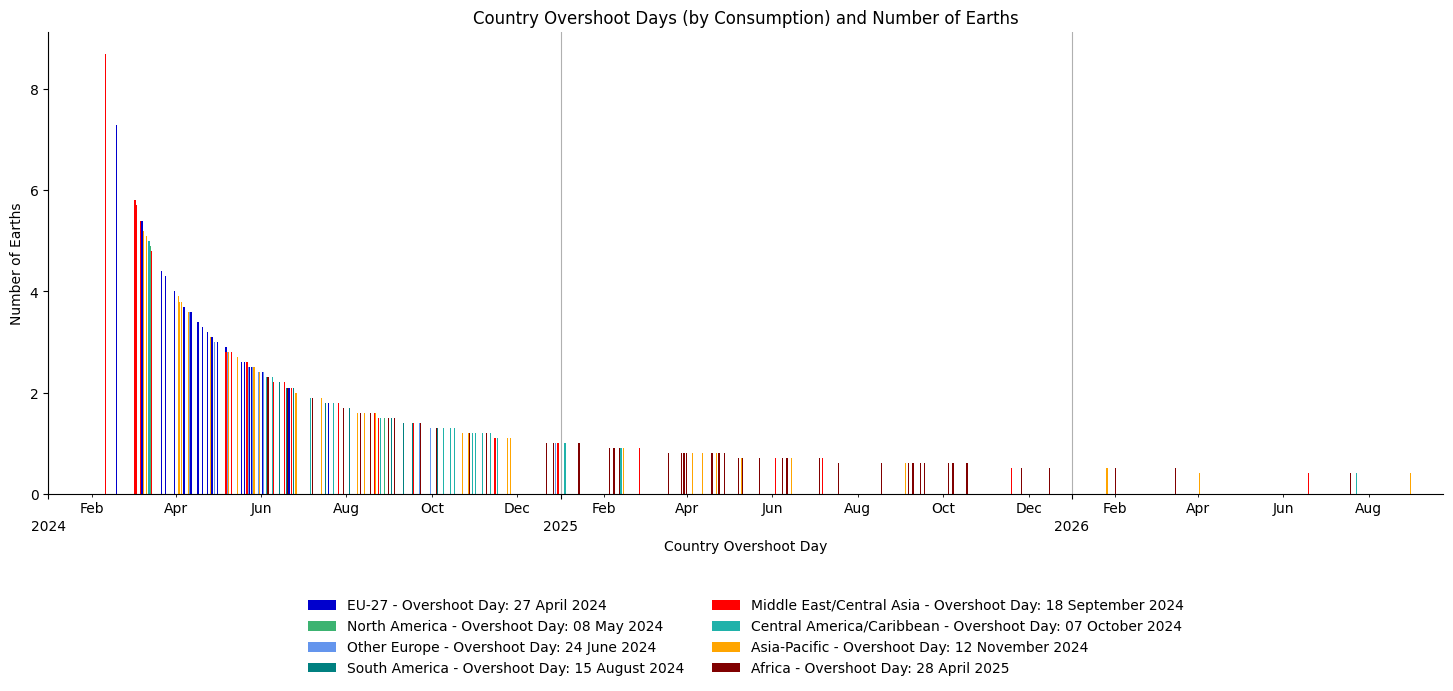

In [35]:
# Matplotlib Graph of Overshoot Days by Consumption (similar to Offical Overshoot Days)

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
import mplcursors


# Colourmap for the regions
region_colours = {
    'North America' : 'mediumseagreen',
    'Central America/Caribbean' : 'lightseagreen',
    'South America' : 'teal',
    'EU-27' : 'mediumblue',
    'Other Europe' : 'cornflowerblue',    
    'Africa' : 'maroon',
    'Middle East/Central Asia' : 'red',
    'Asia-Pacific' : 'orange'
}


# Create a figure and axis
fig, ax = plt.subplots(figsize=(18,6))

# Create a separate bar plot for each region:
for region, color in region_colours.items():
    region_data = df[df['Region'] == region]
    plt.bar(region_data['overshoot_day_consumption'], region_data['num_earths'], color=color, 
            label=f"{region} - Overshoot Day: {region_data['overshoot_day_consumption'].mean().strftime('%d %B %Y')}")
    

# Titles and labels
ax.set_title("Country Overshoot Days (by Consumption) and Number of Earths")
ax.set_xlabel("Country Overshoot Day")
ax.set_ylabel("Number of Earths")


# Format x-axis
# Format x-axis ticks as months
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

# Set x-axis tick labels to display every 2 months
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=2))

# Add ticks to indicate year changes
ax.xaxis.set_major_locator(mdates.YearLocator())

# Display minor ticks as year labels
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Adjust position of year lables to be below month labels
ax.tick_params(axis='x', which='major', pad=15)

# Set x-axis limits to start from the origin
start_date = datetime(2024,1,1)
ax.set_xlim(start_date, df['overshoot_day_consumption'].max())


# Format y-axis
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.grid(which='major', axis='x')


# Hide top spine
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Add hover annotations using mplcursors
mplcursors.cursor(hover=True).connect(
    "add", lambda sel: sel.annotation.set_text(
        f"Country: {df.iloc[sel.target.index]['Country']}\n"
        f"Overshoot Day: {df.iloc[sel.target.index]['overshoot_day_consumption'].strftime('%d %B %Y')}\n"
        f"Number of Earths: {df.iloc[sel.target.index]['num_earths']:.2f}"
    )
)


# Display legend based on average overshoot day by region
# get legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# sort legend labels based on the average overshoot day
sorted_labels = sorted(labels, key=lambda x: datetime.strptime(x.split(': ')[-1].strip(), '%d %B %Y'))
sorted_handles = [handles[labels.index(label)] for label in sorted_labels]

# Recreate legend with sorted labels and handles
legend = ax.legend(sorted_handles, sorted_labels, loc='upper center', bbox_to_anchor=(0.5, -0.2), frameon=False, ncol=2)


# save figure
fig.savefig('Graph_EarthOvershoot Days 2024 by Consumption.png', bbox_inches='tight')

plt.show()

In [21]:
# Dash graph of Overshoot Day by consumption and number of Earths

import dash
from dash import dcc, html, Input, Output, dash_table
from dash.dependencies import Input, Output


# Define the colours based on regions
region_colours = {
    'North America' : 'mediumseagreen',
    'Central America/Caribbean' : 'lightseagreen',
    'South America' : 'teal',
    'EU-27' : 'mediumblue',
    'Other Europe' : 'cornflowerblue',    
    'Africa' : 'maroon',
    'Middle East/Central Asia' : 'red',
    'Asia-Pacific' : 'orange'
}

# Initialise the Dash app
app = dash.Dash(__name__)

# Define a function to map region names to colors
def map_region_to_color(region):
    return region_colours.get(region, 'gray')  # Default color is gray for unknown regions

# Define a callback to print hover annotations
@app.callback(
    Output('hover-data', 'children'),
    [Input('earth-overshoot-graph', 'hoverData')]
)
def display_hover_data(hoverData):
    if hoverData is not None:
        index = hoverData['points'][0]['pointIndex']
        country = df.iloc[index]['Country']
        region = df.iloc[index]['Region']
        overshoot_day = df.iloc[index]['overshoot_day_consumption'].strftime('%Y-%m-%d')
        num_earths = df.iloc[index]['num_earths']
        return (
            f"Country: {country}<br>"
            f"Region: {region}<br>"
            f"Overshoot Day: {overshoot_day}<br>"
            f"Number of Earths: {num_earths}"
        )
    return ""

# Define the layout of the Dash app
app.layout = html.Div([
    dcc.Graph(
        id='earth-overshoot-graph',
        figure={
            'data': [
                {
                    'x': df['overshoot_day_consumption'],
                    'y': df['num_earths'],
                    'type' : 'bar',
                    'text': [f"Country: {country}<br>"
                             f"Region: {region}<br>"
                             f"Overshoot Day: {overshoot_day}<br>"
                             f"Number of Earths: {num_earths}"
                             for country, region, overshoot_day, num_earths in
                             zip(df['Country'], df['Region'], df['overshoot_day_consumption'].dt.strftime('%Y-%m-%d'), df['num_earths'])],
                    'hoverinfo': 'text',  # Display custom text on hover
                    'name': df['Region'], # Set the legend labels
                    'marker': {'color': [map_region_to_color(region) for region in df['Region']]}
                }
            ],
            'layout': {
            'title': 'Earth Overshoot 2024',
            'xaxis': {'title': 'Overshoot Day'},
            'yaxis': {'title': 'Number of Earths'},
            'legend': {'orientation': 'h', 'x': 0, 'y': -0.2}  # Position legend at the bottom
            }
        }
    ),
    html.Div(id='hover-data')
])


# Run the Dash app
if __name__ == '__main__':
    app.run_server(mode='inline', port=2000)


In [5]:
# Simple Dash graph to test visualisation

# Import packages, including DCC Dash Core Components including graph component dcc.Graph
from dash import Dash, html, dcc
import plotly.express as px # to build interactive graphs


# Incorporate data
df = pd.read_csv("Earth_Overshoot_2004.csv")

# Initialise the app
app = Dash(__name__)

# Calcylate min and max y-axis values
min_y = df['num_earths'].min()
max_y = df['num_earths'].max()


# App layout
app.layout = html.Div([
    html.Div(children="Earth Overshoot Graph"),
    dcc.Graph(figure=px.bar(df, 
                                  x='overshoot_day_consumption',
                                  y='num_earths'),
              config={'displayModeBar': False},  # Hide the mode bar for simplicity
              style={'height': '600px'}),  # Adjust height if needed
    dcc.RangeSlider(
        id='y-axis-range-slider',
        min=min_y,
        max=max_y,
        step=1,
        value=[min_y, max_y],
        marks={min_y: str(min_y), max_y: str(max_y)}
    )
])


# Run the app
if __name__ == '__main__':
    app.run_server(mode='inline', port=8051)

In [6]:
# Simple Plotly graph to test visualisation

import plotly.express as px

px.bar(df,
       x = 'overshoot_day_consumption',
       y = 'footprint_consumption'
)

### Problems with the visualisations

##### Matplotlib graph
- Appears correct in terms of the curves
- Shows density of how countries are clustered around time of the year
- However, does it show when individual countries which share the same Overshoot Day?
- Limited interactivity

##### Dash and Plotly graphs
- Plots of y-axis appear incorrect - eg plots at 10, when the hover on y-value = 2.5
- Solved: Countries with the same Overshoot Days are stacked on top of each other
- eg 4 countries with Overshoot Day on 27 May 2024/2.5 Earths (Malta, Portugal, Croatia, French Polynesia)


##### Possible solutions
- Build interactive graphs using Dash, eg annotations on hover, dropdown menu to break down categories
- Adjust graph to not show stacking of the same values
- Adjust line thickness to show number of countries on the same day
- ie. so that it shows all countries at scale to the timeline
- See Gapminder for examples of visualising similar datasets, that show countries, regions that may show the same values over a period of time


### New graph to show Number of Countries by Overshoot Days

In [82]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd


# Define the colours based on regions
region_colours = {
    'North America': 'mediumseagreen',
    'Central America/Caribbean': 'lightseagreen',
    'South America': 'teal',
    'EU-27': 'mediumblue',
    'Other Europe': 'cornflowerblue',
    'Africa': 'maroon',
    'Middle East/Central Asia': 'red',
    'Asia-Pacific': 'orange'
}

# Initialise the Dash app
app = dash.Dash(__name__)

# Define the layout of the Dash app
app.layout = html.Div([
    dcc.Graph(
        id='earth-overshoot-graph',
        figure={
            'data': [
                {
                    'x': df['overshoot_day_consumption'],
                    'y': [1] * len(df),  # Set y to 1 to create individual bars
                    'type': 'bar',
                    'text': [f"Country: {country}<br>Region: {region}<br>"
                             f"Overshoot Day: {overshoot_day}<br>"
                             f"Number of Earths: {num_earths}"
                             for country, region, overshoot_day, num_earths in
                             zip(df['Country'], df['Region'], df['overshoot_day_consumption'], df['num_earths'])],
                    'hoverinfo': 'text',  # Display custom text on hover
                    'marker': {'color': [region_colours[region] for region in df['Region']]}  # Use region colors
                }
            ],
            'layout': {
                'title': 'Number of Countries by Overshoot Day',
                'xaxis': {
                    'title': 'Overshoot Day',
                    'tickmode': 'array',  # Set the tick mode to array
                    'tickvals': pd.date_range(start='2024-01-01', end='2026-12-01', freq='MS').to_list(),  # Set tick values to the start of each month
                    'ticktext': pd.date_range(start='2024-01-01', end='2026-12-01', freq='MS').strftime('%b'),  # Set tick text to each month abbreviation
                    'tickangle': -45,  # Rotate tick labels for better visibility
                    'tickfont': {'size': 10},  # Set tick font size
                    'showgrid': True  # Show gridlines
                },
                'xaxis2': {  # Secondary x-axis for years
                    'tickmode': 'array',  # Set the tick mode to array
                    'tickvals': pd.date_range(start='2024-01-01', end='2026-01-01', freq='YS').to_list(),  # Set tick values to the start of each year
                    'ticktext': pd.date_range(start='2024-01-01', end='2026-01-01', freq='YS').strftime('%Y').to_list(),  # Set tick text to each year
                    'showgrid': False  # Hide gridlines
                },
                'yaxis': {'title': 'Number of Countries'},
                'legend': {
                    'orientation': 'h',  # Horizontal legend
                    'x': 0,  # Align legend to the left
                    'y': -0.2,  # Position legend at the bottom
                    'traceorder': 'normal'  # Show traces in the order they are provided
                },
                'annotations': [
                    {'x': overshoot_day, 'y': 0, 'text': year, 'showarrow': False, 'xanchor': 'center', 'yanchor': 'top'}
                    for overshoot_day, year in zip(pd.date_range(start='2024-01-01', end='2026-12-01', freq='MS').to_list(), pd.date_range(start='2024-01-01', end='2026-12-01', freq='YS').strftime('%Y').to_list())
                ]  # Add annotations for the years
            }
        }
    ),
    html.Div(id='hover-data')
])

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)
